In [1]:
#dependencies
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#import file
spotify_file = "Resources\spotify_clean.csv"
spotify_df = pd.read_csv(spotify_file)
spotify_df.head()

,track_name,album_popularity,artist_name,artist_followers,artist_popularity,artist_genres,rank,week,danceability,energy,acousticness,liveness,tempo,duration,streams,genre_category
0,Starboy,0,The Weeknd,51215861,94,"canadian contemporary r&b, canadian pop, pop",1,1/6/2017,0.681,0.594,0.1650,0.134,186.054,230453,25734078,International
1,Closer,71,The Chainsmokers,19562506,81,"dance pop, edm, electropop, pop, pop dance, tr...",2,1/6/2017,0.748,0.524,0.4140,0.111,95.010,244960,23519705,Dance
2,Rockabye (feat. Sean Paul & Anne-Marie),62,Clean Bandit,4943046,76,"dance pop, edm, pop, pop dance, post-teen pop,...",3,1/6/2017,0.720,0.763,0.4060,0.180,101.965,251088,21216399,Dance
3,Let Me Love You,0,DJ Snake,8137850,78,"dance pop, edm, electronic trap, pop, pop danc...",4,1/6/2017,0.476,0.718,0.0784,0.122,199.864,205946,19852704,Dance
4,I Don’t Wanna Live Forever (Fifty Shades Darke...,0,ZAYN,21433236,77,"dance pop, pop, post-teen pop, uk pop",5,1/6/2017,0.735,0.451,0.0631,0.325,117.973,245200,18316326,Dance


In [3]:
# convert date column to date
spotify_df['week'] = pd.to_datetime(spotify_df['week'])
print(spotify_df.dtypes)

track_name                   object
album_popularity              int64
artist_name                  object
artist_followers              int64
artist_popularity             int64
artist_genres                object
rank                          int64
week                 datetime64[ns]
danceability                float64
energy                      float64
acousticness                float64
liveness                    float64
tempo                       float64
duration                      int64
streams                       int64
genre_category               object
dtype: object


In [4]:
# Group dates by quarter
spotify_df_q = spotify_df.copy()
spotify_df_q['quarter'] = pd.PeriodIndex(spotify_df.week, freq = 'Q')
spotify_df_q.head()


,track_name,album_popularity,artist_name,artist_followers,artist_popularity,artist_genres,rank,week,danceability,energy,acousticness,liveness,tempo,duration,streams,genre_category,quarter
0,Starboy,0,The Weeknd,51215861,94,"canadian contemporary r&b, canadian pop, pop",1,2017-01-06,0.681,0.594,0.1650,0.134,186.054,230453,25734078,International,2017Q1
1,Closer,71,The Chainsmokers,19562506,81,"dance pop, edm, electropop, pop, pop dance, tr...",2,2017-01-06,0.748,0.524,0.4140,0.111,95.010,244960,23519705,Dance,2017Q1
2,Rockabye (feat. Sean Paul & Anne-Marie),62,Clean Bandit,4943046,76,"dance pop, edm, pop, pop dance, post-teen pop,...",3,2017-01-06,0.720,0.763,0.4060,0.180,101.965,251088,21216399,Dance,2017Q1
3,Let Me Love You,0,DJ Snake,8137850,78,"dance pop, edm, electronic trap, pop, pop danc...",4,2017-01-06,0.476,0.718,0.0784,0.122,199.864,205946,19852704,Dance,2017Q1
4,I Don’t Wanna Live Forever (Fifty Shades Darke...,0,ZAYN,21433236,77,"dance pop, pop, post-teen pop, uk pop",5,2017-01-06,0.735,0.451,0.0631,0.325,117.973,245200,18316326,Dance,2017Q1


In [5]:
# group by genre, quarter and sum streams
spotify_df_group_q = spotify_df_q.groupby(['genre_category', 'quarter']).sum()[['streams']]
spotify_df_group_q = spotify_df_group_q.reset_index() 
spotify_df_group_q.head()

,genre_category,quarter,streams
0,Dance,2017Q1,6320498944
1,Dance,2017Q2,5624978884
2,Dance,2017Q3,6858116387
3,Dance,2017Q4,6326952865
4,Dance,2018Q1,5935056347


In [6]:
# Quarter needs to be numeric for seaborn to recognize the value in a line chart
#convert quarter to a string
spotify_df_group_q['quarter'] = spotify_df_group_q['quarter'].astype(str)

# create replace dictionary
convert_quarter = {
    '2017Q1' : 2017.00,
    '2017Q2' : 2017.25,
    '2017Q3' : 2017.50,
    '2017Q4' : 2017.75,
    '2018Q1' : 2018.00,
    '2018Q2' : 2018.25,
    '2018Q3' : 2018.50,
    '2018Q4' : 2018.75,
    '2019Q1' : 2019.00,
    '2019Q2' : 2019.25,
    '2019Q3' : 2019.50,
    '2019Q4' : 2019.75,
    '2020Q1' : 2020.00,
    '2020Q2' : 2020.25,
    '2020Q3' : 2020.50,
    '2020Q4' : 2020.75,
    '2021Q1' : 2021.00,
    '2021Q2' : 2021.25,
    '2021Q3' : 2021.50,
    '2021Q4' : 2021.75
    }

# create a new column quarter num and use replacements
spotify_df_group_q['quarter_num'] = spotify_df_group_q['quarter'].replace(convert_quarter, regex = True)

# change dtype for quarter_num to float
spotify_df_group_q['quarter_num'] = spotify_df_group_q['quarter_num'].astype(float)

# Remove 2021Q2 because data goes through April 2021 which is not a full quarter. 
spotify_df_group_q.drop(spotify_df_group_q[spotify_df_group_q['quarter'] == '2021Q2'].index, inplace = True)

spotify_df_group_q.tail()

,genre_category,quarter,streams,quarter_num
102,Rock,2020Q1,313223159,2020.00
103,Rock,2020Q2,424958157,2020.25
104,Rock,2020Q3,441012389,2020.50
105,Rock,2020Q4,983682664,2020.75
106,Rock,2021Q1,896384372,2021.00


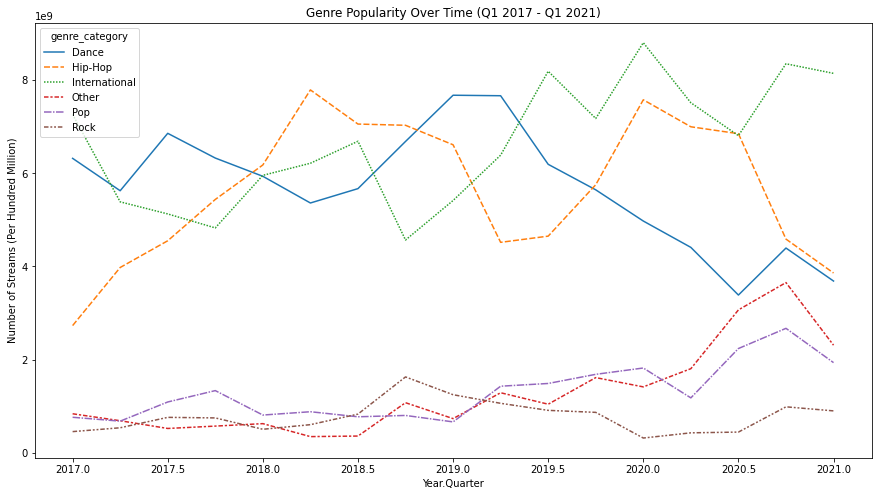

In [8]:
fig, ax = plt.subplots(figsize = (15, 8))
sns.lineplot(x = 'quarter_num', y = 'streams', data = spotify_df_group_q, hue = 'genre_category', style = 'genre_category', ax=ax)
plt.title('Genre Popularity Over Time (Q1 2017 - Q1 2021)')
plt.xlabel('Year.Quarter')
plt.ylabel('Number of Streams (Per Hundred Million)')

plt.savefig("GenreFig.png")
plt.show()
